In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
etth1data = pd.read_csv('dataset/ETT-small/ETTh1.csv')
etth1data = etth1data.drop('date', axis=1)
target = etth1data.pop('OT')
etth1data.insert(0, 'OT', target)
data1 = etth1data
# pcmci_result = np.array([8, -1, 10, -1, 11,  4, 16, 20, 14, -1, 19, 13, -1,  9, 13,  7, 10,
#                             -1, 17, 17,  3, 16,  0, 16, 13])
pcmci_result = np.array([1, 1, 3, 1, 3, 2, 1]).astype(int)

In [2]:
etth2data = pd.read_csv('dataset/ETT-small/ETTh2.csv')
etth2data = etth2data.drop('date', axis=1)
target = etth2data.pop('OT')
etth2data.insert(0, 'OT', target)
data1 = etth2data
pcmci_result = np.array([1, 1, 1, 1, 1, 1, 1]).astype(int)

In [2]:
ettm1data = pd.read_csv('dataset/ETT-small/ETTm1.csv')
ettm1data = ettm1data.drop('date', axis=1)
target = ettm1data.pop('OT')
ettm1data.insert(0, 'OT', target)
data1 = ettm1data
pcmci_result = np.array([1, 1, 1, 1, 1, 1, 1]).astype(int)

In [10]:
ettm2data = pd.read_csv('dataset/ETT-small/ETTm2.csv')
ettm2data = ettm2data.drop('date', axis=1)
target = ettm2data.pop('OT')
ettm2data.insert(0, 'OT', target)
data1 = ettm2data
pcmci_result = np.array([1, 1, 1, 1, 1, 1, 1]).astype(int)

In [2]:
exchangedata = pd.read_csv('dataset/exchange_rate/exchange_rate.csv')
exchangedata = exchangedata.drop('date', axis=1)
target = exchangedata.pop('OT')
exchangedata.insert(0, 'OT', target)
data1 = exchangedata
pcmci_result = np.array([1, -1, 3, 5, 3, -1, 1, 1]).astype(int)

In [12]:
illnessdata = pd.read_csv('dataset/illness/national_illness.csv')
illnessdata = illnessdata.drop('date', axis=1)
target = illnessdata.pop('OT')
illnessdata.insert(0, 'OT', target)
data1 = illnessdata
pcmci_result = np.array([1, 1, 1, 1, 1, 1, 1]).astype(int)

In [37]:
metrodata = pd.read_csv('Metro_Interstate_Traffic_Volume.csv').drop(['weather_description', 'date_time'], axis=1)
target = metrodata.pop('traffic_volume')
metrodata.insert(0, 'OT', target)
metrodata.loc[metrodata['holiday'] == 'None', 'holiday'] = 0
metrodata.loc[metrodata['holiday'] != 0, 'holiday'] = 1
metrodata['holiday'] = metrodata['holiday'].astype('int64')
metrodata['weather_main'] = metrodata['weather_main'].map({'Clouds':0. , 'Clear':1., 'Rain':2., 'Drizzle':3., 'Mist':4., 'Haze':5., 'Fog':6.,
                                                            'Thunderstorm':7., 'Snow':8., 'Squall':9., 'Smoke':10.})
data1 = metrodata
pcmci_result = np.array([1, 1, 1, 1, 1, 1, 1]).astype(int)

In [2]:
pmdata = pd.read_csv('beijing_air.csv')
pmdata['date'] = pd.to_datetime(pmdata['date'])
pmdata['year'] = pmdata['date'].apply(lambda x:x.year)
pmdata['month'] = pmdata['date'].apply(lambda x:x.month)
pmdata['day'] = pmdata['date'].apply(lambda x:x.day)
pmdata['hour'] = pmdata['date'].apply(lambda x:x.hour)
pmdata = pmdata.drop(['date', 'wnd_dir'], axis=1)
pmdata.dtypes

data1 = pmdata
pcmci_result = np.array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]).astype(int)

In [3]:
sorted_data = data1.iloc[:, pcmci_result > -1]
sorted_data

,OT,HUFL,HULL,MUFL,MULL,LUFL,LULL
0,30.531000,5.827,2.009,1.599,0.462,4.203,1.340
1,30.459999,5.760,2.076,1.492,0.426,4.264,1.401
2,30.038000,5.760,1.942,1.492,0.391,4.234,1.310
3,27.013000,5.760,1.942,1.492,0.426,4.234,1.310
4,27.787001,5.693,2.076,1.492,0.426,4.142,1.371
...,...,...,...,...,...,...,...
69675,9.567000,9.310,3.550,5.437,1.670,3.868,1.462
69676,9.567000,10.114,3.550,6.183,1.564,3.716,1.462
69677,9.426000,10.784,3.349,7.000,1.635,3.746,1.432
69678,9.426000,11.655,3.617,7.533,1.706,4.173,1.523


In [4]:
sorted_arrows = pcmci_result[pcmci_result > -1].astype(int)
sorted_arrows

array([1, 1, 1, 1, 1, 1, 1])

In [5]:
tau_max = 20
ar_range = 10

lagged_data = pd.DataFrame(sorted_data.iloc[tau_max:, 0])
for i in range(1, ar_range):
    lagged_data['OT' + '_' + str(i)] = np.array(sorted_data.iloc[tau_max-i:-i, 0])
for i in range(sorted_data.shape[1]):
    if sorted_arrows[i] == 0:
        lagged_data[sorted_data.columns[i] + '_' + str(sorted_arrows[i])] = np.array(sorted_data.iloc[tau_max:, i])
        continue
    lagged_data[sorted_data.columns[i] + '_' + str(sorted_arrows[i])] = np.array(sorted_data.iloc[tau_max - sorted_arrows[i]:-sorted_arrows[i], i])


In [6]:
minmaxgap =  lagged_data.iloc[:, 0].max() - lagged_data.iloc[:, 0].min()
minmaxgap

50.22800016403198

In [7]:
lagged_data = (lagged_data - lagged_data.min()) / ( lagged_data.max() - lagged_data.min())
lagged_data

,OT,OT_1,OT_2,OT_3,OT_4,OT_5,OT_6,OT_7,OT_8,OT_9,HUFL_1,HULL_1,MUFL_1,MULL_1,LUFL_1,LULL_1
20,0.505594,0.502807,0.537808,0.511209,0.521004,0.512603,0.553217,0.572828,0.582643,0.621844,0.605921,0.485320,0.626693,0.470563,0.534586,0.606973
21,0.498606,0.505594,0.502807,0.537808,0.511209,0.521004,0.512603,0.553217,0.572828,0.582643,0.608747,0.489505,0.627503,0.473154,0.540884,0.620783
22,0.505594,0.498606,0.505594,0.502807,0.537808,0.511209,0.521004,0.512603,0.553217,0.572828,0.615811,0.502061,0.630697,0.478264,0.559777,0.648177
23,0.505594,0.505594,0.498606,0.505594,0.502807,0.537808,0.511209,0.521004,0.512603,0.553217,0.620050,0.506247,0.633104,0.478264,0.569172,0.655196
24,0.537808,0.505594,0.505594,0.498606,0.505594,0.502807,0.537808,0.511209,0.521004,0.512603,0.629940,0.510432,0.637895,0.488484,0.603758,0.689608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69675,0.274508,0.278709,0.281516,0.278709,0.280123,0.281516,0.282910,0.288524,0.291312,0.292725,0.676543,0.569028,0.706641,0.549878,0.509395,0.648177
69676,0.274508,0.274508,0.278709,0.281516,0.278709,0.280123,0.281516,0.282910,0.288524,0.291312,0.686432,0.577399,0.715436,0.554988,0.521990,0.641386
69677,0.271701,0.274508,0.274508,0.278709,0.281516,0.278709,0.280123,0.281516,0.282910,0.288524,0.703387,0.577399,0.732218,0.547359,0.506298,0.641386
69678,0.271701,0.271701,0.274508,0.274508,0.278709,0.281516,0.278709,0.280123,0.281516,0.282910,0.717515,0.564843,0.750596,0.552469,0.509395,0.634594


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

/home/dell/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
class Mine(nn.Module):
    def __init__(self, input_size = 2, hidden_size = 32):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        nn.init.normal_(self.fc1.weight,std=0.02)
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.normal_(self.fc2.weight,std=0.02)
        nn.init.constant_(self.fc2.bias, 0)
        nn.init.normal_(self.fc3.weight,std=0.02)
        nn.init.constant_(self.fc3.bias, 0)
        
    def forward(self, input):
        output = F.relu(self.fc1(input))
        output = F.relu(self.fc2(output))
        output = self.fc3(output)
        return output

In [10]:
class Z_RNN(nn.Module):
    def __init__(self, input_size = 2, hidden_size = 32, num_layers = 1, output_size = 2):
        super(Z_RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size = input_size,
            hidden_size = hidden_size,     # rnn hidden unit
            num_layers = num_layers,       # number of rnn layer
            batch_first = True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        # print(r_out.shape)
        # outs = []    # save all predictions
        # for time_step in range(r_out.size(1)):    # calculate output for each time step
        #     outs.append(self.out(r_out[:, time_step, :]))

        # return torch.stack(outs, dim=1), h_state

        outs = self.out(r_out)
        return outs, h_state

In [11]:
class Regressor(nn.Module):
    def __init__(self, input_size = 2, hidden_size = 32):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
        nn.init.normal_(self.fc1.weight,std=0.02)
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.normal_(self.fc2.weight,std=0.02)
        nn.init.constant_(self.fc2.bias, 0)
        nn.init.normal_(self.fc3.weight,std=0.02)
        nn.init.constant_(self.fc3.bias, 0)
        
    def forward(self, input):
        output = F.relu(self.fc1(input))
        output = F.relu(self.fc2(output))
        output = self.fc3(output)
        return output

In [12]:
data2 = lagged_data.copy()
data = np.array(data2)
data.shape

(69660, 16)

In [13]:
train_proportion = 0.6
valid_proportion = 0.2
test_proportion = 0.2

train_size = int(data.shape[0] * train_proportion)
valid_size = int(data.shape[0] * valid_proportion)

train_data = data[:train_size]
valid_data = data[train_size:train_size+valid_size]
test_data = data[train_size+valid_size:]

batch_size = 20
window_size = 400

z_size = data.shape[1]

In [14]:
# Z_spare = Z
Z = np.load('results/ettm1_z.npy')

In [15]:
train_Z = Z[:train_size]
valid_Z = Z[train_size:train_size+valid_size]
test_Z = Z[train_size+valid_size:]

In [16]:
def mutual_information_explicit(joint_X, marginal_X, Y, mine_net):
    t = mine_net( torch.cat((joint_X, Y), axis = 1) )
    marginal_t = mine_net( torch.cat((marginal_X, Y), axis = 1) )

    # Z, h_state = zrnn_net( torch.cat((joint_X[:-1, :], Y[:-1, :]), 1), h_state)
    # t = mine_net( torch.cat((joint_X[1:, :], Y[1:, :], Z), axis = 1) )
    # marginal_t = mine_net( torch.cat((marginal_X[1:, :], Y[1:, :], Z), axis = 1) )

    et = torch.exp(marginal_t)
    mi_lb = torch.mean(t) - torch.log(torch.mean(et))
    return mi_lb, t, et

def learn_mine_explicit(X, Y, mine_net, mine_net_optim, ma_et, ma_rate=0.01):
    # batch is a tuple of (joint, marginal)
    index = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=False)
    marginal_X = X[index]
    X = torch.autograd.Variable(torch.FloatTensor(X)).cuda()
    Y = torch.autograd.Variable(torch.FloatTensor(Y)).cuda()
    marginal_X = torch.autograd.Variable(torch.FloatTensor(marginal_X)).cuda()

    mi_lb, t, et = mutual_information_explicit(X, marginal_X, Y, mine_net)
    ma_et = (1-ma_rate)*ma_et + ma_rate*torch.mean(et)
    
    # unbiasing use moving average
    loss = -(torch.mean(t) - (1/ma_et.mean()).detach()*torch.mean(et))
    # use biased estimator
#     loss = - mi_lb
    
    mine_net_optim.zero_grad()
    autograd.backward(loss)
    mine_net_optim.step()
    return mi_lb, ma_et, loss

In [17]:
def train_explicit(data, mine_net, mine_net_optim, batch_size=100, iter_num=int(1e+3) , log_freq=int(1e+2)):
# def train(data, mine_net, mine_net_optim, zrnn_net, zrnn_net_optim, h_state, batch_size=100, iter_num=3000, log_freq=int(1e+2)):
    # data is x or y
    result = list()
    loss = list()
    ma_et = 1.
    for i in tqdm(range(iter_num)):
        X = np.expand_dims(data[:, 0], 1)
        Y = data[:, 1:]
        # Y = np.expand_dims(data[:, 0], 1)
        if Y.ndim == 1:
            Y = np.expand_dims(Y, 1)

        mi_lb, ma_et, l = learn_mine_explicit(X, Y, mine_net, mine_net_optim, ma_et)
        # if (i+1)%(10)==0:
        result.append(mi_lb.detach().cpu().numpy())
        loss.append(l.detach().cpu().numpy())
        if (i+1)%(log_freq)==0:
            print(result[-1])
    return result, loss

In [18]:
mine_net_explicit = Mine(input_size = data.shape[1], hidden_size = 512).cuda()
mine_net_explicit_optim = optim.Adam(mine_net_explicit.parameters(), lr=1e-3, weight_decay = 1e-5)
result_explicit = train_explicit(train_data, mine_net_explicit, mine_net_explicit_optim, batch_size=2000, iter_num=int(1e+5), log_freq=int(1e+4))

 10%|█         | 10006/100000 [02:48<26:07, 57.42it/s]

2.8719423


 20%|██        | 20011/100000 [05:36<22:25, 59.47it/s]

2.9555275


 29%|██▉       | 29343/100000 [08:17<19:58, 58.94it/s]


KeyboardInterrupt: 

In [ ]:
mine_net_explicit_plus_Z = Mine(input_size = data.shape[1]+z_size+1, hidden_size = 512).cuda()
mine_net_explicit_plus_Z_optim = optim.Adam(mine_net_explicit_plus_Z.parameters(),
                                            lr=1e-3, weight_decay = 1e-5)
result_explicit_plus_Z = train_explicit(np.concatenate((train_data, train_Z), axis=1),
                                        mine_net_explicit_plus_Z, mine_net_explicit_plus_Z_optim,
                                        batch_size=2000, iter_num=int(1e+5), log_freq=int(1e+4))

 10%|█         | 10026/100000 [00:59<08:58, 167.21it/s]

3.1845326


 20%|██        | 20031/100000 [01:58<07:51, 169.62it/s]

3.1655667


 30%|███       | 30028/100000 [02:57<06:52, 169.43it/s]

3.2866392


 40%|████      | 40021/100000 [03:56<05:48, 172.01it/s]

3.2627819


 50%|█████     | 50019/100000 [04:56<05:04, 163.94it/s]

3.3239322


 60%|██████    | 60017/100000 [05:55<03:50, 173.46it/s]

3.2119262


 70%|███████   | 70019/100000 [06:55<02:55, 170.69it/s]

3.298956


 80%|████████  | 80024/100000 [07:54<01:54, 174.38it/s]

3.3584268


 90%|█████████ | 90034/100000 [08:53<00:56, 177.66it/s]

3.3387184


100%|██████████| 100000/100000 [09:51<00:00, 169.01it/s]


3.3866715


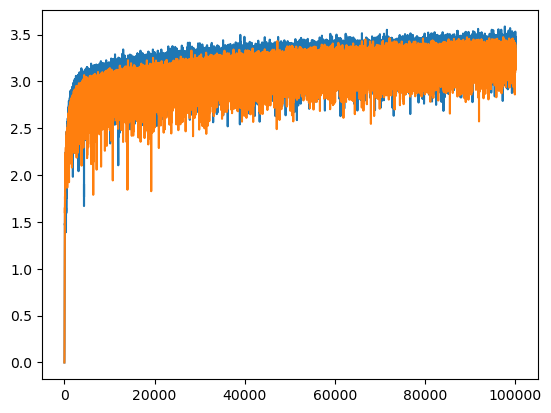

In [ ]:
plt.plot(result_explicit_plus_Z[0])
plt.plot(result_explicit[0])

In [ ]:
# mine_net_explicit = Mine(input_size = data.shape[1]) #.cuda()
mine_net_explicit = Mine(input_size = 2).cuda()
mine_net_explicit_optim = optim.Adam(mine_net_explicit.parameters(), lr=1e-3, weight_decay = 1e-5)
result_entropy = train_explicit(np.concatenate((np.expand_dims(train_data[:, 0], 1), (np.expand_dims(train_data[:, 0], 1))), 1), mine_net_explicit, mine_net_explicit_optim, batch_size=2000, iter_num=int(1e+5), log_freq=int(1e+4))

 10%|█         | 10026/100000 [01:01<07:55, 189.13it/s]

4.645953


 20%|██        | 20033/100000 [01:58<07:36, 175.29it/s]

4.570541


 30%|███       | 30019/100000 [02:54<06:45, 172.76it/s]

5.2976465


 40%|████      | 40030/100000 [03:51<06:16, 159.43it/s]

5.3081937


 50%|█████     | 50032/100000 [04:50<04:49, 172.86it/s]

4.532874


 60%|██████    | 60025/100000 [05:50<04:05, 163.01it/s]

5.674264


 70%|███████   | 70020/100000 [06:49<02:59, 166.65it/s]

5.5212317


 80%|████████  | 80017/100000 [07:48<02:00, 166.13it/s]

4.833047


 90%|█████████ | 90018/100000 [08:48<01:02, 159.61it/s]

5.5165496


100%|██████████| 100000/100000 [09:47<00:00, 170.17it/s]


5.8096013


In [ ]:
def train_reg_withoutZ(data, regr_net, regr_net_optim, window_size, iter_num = 5000):
    X = np.expand_dims(data[:, 0], 1)
    Y = data[:, 1:]
    X = torch.autograd.Variable(torch.FloatTensor(X)).cuda()
    Y = torch.autograd.Variable(torch.FloatTensor(Y)).cuda()
    pivot = np.random.randint(X.shape[0]-window_size)
    X = X[pivot:pivot+window_size]
    Y = Y[pivot:pivot+window_size]

    loss_array = []
    for _ in tqdm(range(iter_num)):
        h_state = None
        # X_pred = regr_net(Y)
        X_pred, h_state = regr_net(Y, h_state)
        mseloss = torch.nn.MSELoss(reduction = 'sum')
        loss = mseloss(X_pred, X)
        regr_net_optim.zero_grad()
        autograd.backward(loss)
        nn.utils.clip_grad_norm(regr_net.parameters(), max_norm=0.001, norm_type=2)
        regr_net_optim.step()
        loss_array.append(loss.detach().cpu().numpy())
    
    return loss_array, X_pred.detach().cpu().numpy()

# regr_net_without_Z = Regressor(input_size = data.shape[1]-1, hidden_size = data.shape[1] * 4).cuda()
regr_net_without_Z = Z_RNN(input_size = train_data.shape[1]-1, hidden_size = train_data.shape[1]*4, num_layers = 2, output_size = 1).cuda()
regr_net_without_Z_optim = optim.Adam(regr_net_without_Z.parameters(), lr = 5e-4, weight_decay = 1e-5)
loss_array, train_X_pred_without_Z = train_reg_withoutZ(train_data, regr_net_without_Z, regr_net_without_Z_optim, window_size, iter_num = 30000)


  0%|          | 0/30000 [00:00<?, ?it/s]/tmp/ipykernel_1186756/508745452.py:19: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(regr_net.parameters(), max_norm=0.001, norm_type=2)
100%|██████████| 30000/30000 [04:41<00:00, 106.43it/s]


In [ ]:
train_Y = train_data[:, 1:]
train_Y = torch.autograd.Variable(torch.FloatTensor(train_Y)).cuda()

h_state = None
train_X_pred, h_state = regr_net_without_Z(train_Y, h_state)
train_X_pred = train_X_pred.detach().cpu().numpy()
train_X_pred

array([[0.47384197],
       [0.45519075],
       [0.45290926],
       ...,
       [0.4363702 ],
       [0.42285675],
       [0.4048991 ]], dtype=float32)

In [24]:
mine_net_explicit = Mine(input_size = 2).cuda()
mine_net_explicit_optim = optim.Adam(mine_net_explicit.parameters(), lr=1e-3, weight_decay = 1e-5)
result_pretrainX = train_explicit(np.concatenate((np.expand_dims(train_data[:, 0], 1), train_X_pred), 1), mine_net_explicit, mine_net_explicit_optim, batch_size=2000, iter_num=int(1e+5), log_freq=int(1e+4))

NameError: name 'train_X_pred' is not defined

In [21]:
# print('Pretrain:', np.max(result_pretrainX[0]))
print('Explicit:', np.max(result_explicit[0]))
print('Explicit+Z:', np.max(result_explicit_plus_Z[0]))
# print('Entropy:', np.max(result_entropy[0]))

Explicit: 3.4729977
Explicit+Z: 3.586423


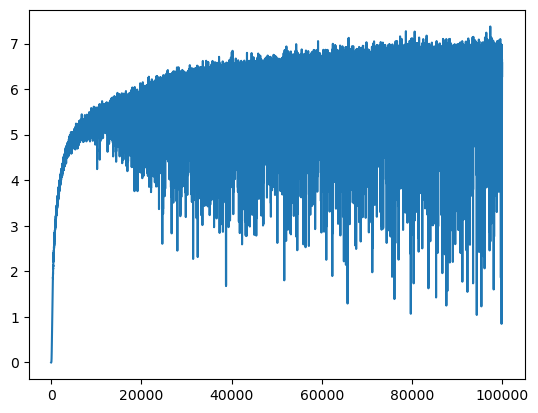

In [148]:
# plt.plot(result)
plt.plot(result_entropy[0])
# plt.plot(result_explicit_plus_Z[0])
# plt.plot(result_explicit[0])
# plt.plot(result_pretrainX[0])
# plt.plot(result_explicit[0])

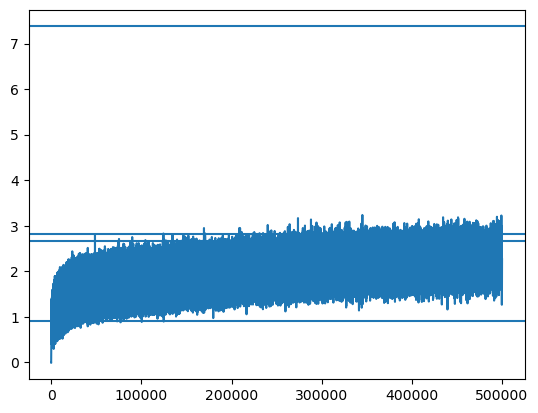

In [138]:
plt.plot(result)
plt.axhline(np.max(result_pretrainX[0]))
plt.axhline(np.max(result_explicit[0]))
plt.axhline(np.max(result_explicit_plus_Z[0]))
plt.axhline(np.max(result_entropy[0]))

In [ ]:
np.max(result_explicit_plus_Z[0]), np.max(result_explicit[0]), np.max(result_entropy)

(2.8290417, 2.6582675, 6.891037)